In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tseries.offsets import DateOffset


In [2]:
df = pd.read_csv('BTC.csv',parse_dates=['Date'])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,APrice
0,2010-07-16,0.04951,0.04951,0.04951,0.04951,0.04951,0,0.049510
1,2010-07-17,0.04951,0.08585,0.05941,0.08584,0.08584,5,0.067675
2,2010-07-18,0.08584,0.09307,0.07723,0.08080,0.08080,49,0.083320
3,2010-07-19,0.08080,0.08181,0.07426,0.07474,0.07474,20,0.077770
4,2010-07-20,0.07474,0.07921,0.06634,0.07921,0.07921,42,0.076975


In [3]:
# import pandas_profiling

# pandas_profiling.ProfileReport(df)

In [4]:
# profile = pandas_profiling.ProfileReport(df)
# profile.to_file(outputfile="Titanic data profiling.html")

In [5]:
df1=df.drop(columns=['Open','High','Low','Close','Adj Close','Volume'])
df1.tail()

,Date,APrice
3250,2019-06-09,7832.219971
3251,2019-06-10,7969.159912
3252,2019-06-11,8045.729981
3253,2019-06-12,8204.855225
3254,2019-06-13,8464.495118


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3255 entries, 0 to 3254
Data columns (total 2 columns):
Date       3255 non-null datetime64[ns]
APrice     3255 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 50.9 KB


In [7]:
df2 = df1.set_index('Date')
df2.index

DatetimeIndex(['2010-07-16', '2010-07-17', '2010-07-18', '2010-07-19',
               '2010-07-20', '2010-07-21', '2010-07-22', '2010-07-23',
               '2010-07-24', '2010-07-25',
               ...
               '2019-06-04', '2019-06-05', '2019-06-06', '2019-06-07',
               '2019-06-08', '2019-06-09', '2019-06-10', '2019-06-11',
               '2019-06-12', '2019-06-13'],
              dtype='datetime64[ns]', name='Date', length=3255, freq=None)

In [8]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np
import pandas as pd
import numpy as np
%matplotlib inline
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
print(__version__)
init_notebook_mode(connected=True)
cf.go_offline()

3.10.0


In [9]:
plotly.__version__

'3.10.0'

In [10]:
cf.__version__

'0.15'

In [11]:
df= df2.resample('D').mean()


In [12]:
df.describe().transpose

<bound method DataFrame.transpose of             APrice 
count   3246.000000
mean    1725.106905
std     3024.586024
min        0.049510
25%       13.275000
50%      374.845001
75%     1177.093735
max    19206.155270>

In [13]:

df.iplot()


In [14]:
timeseries = df['APrice '].dropna()


In [15]:
type(timeseries)

pandas.core.series.Series

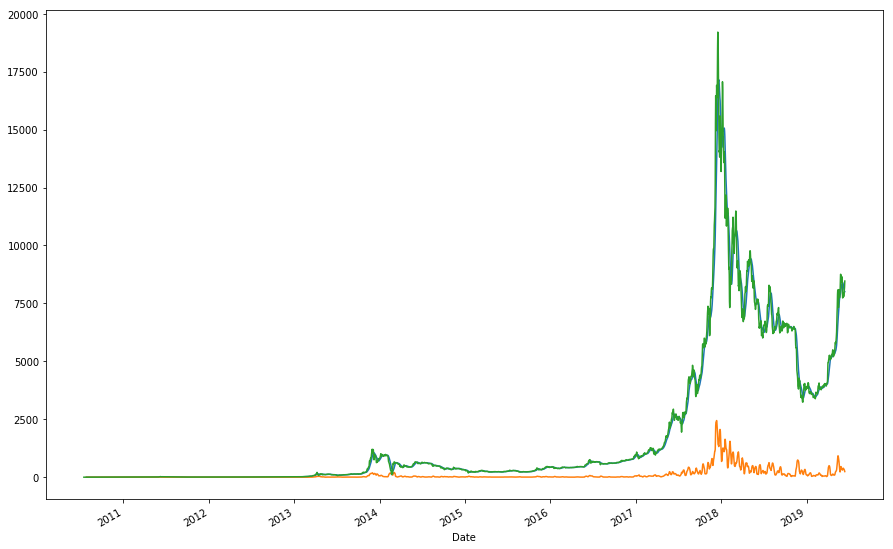

In [16]:
timeseries.rolling(12).mean().plot(label='12 months data')
timeseries.rolling(12).std().plot(label='12 months data')

timeseries.plot(figsize=(15,10))

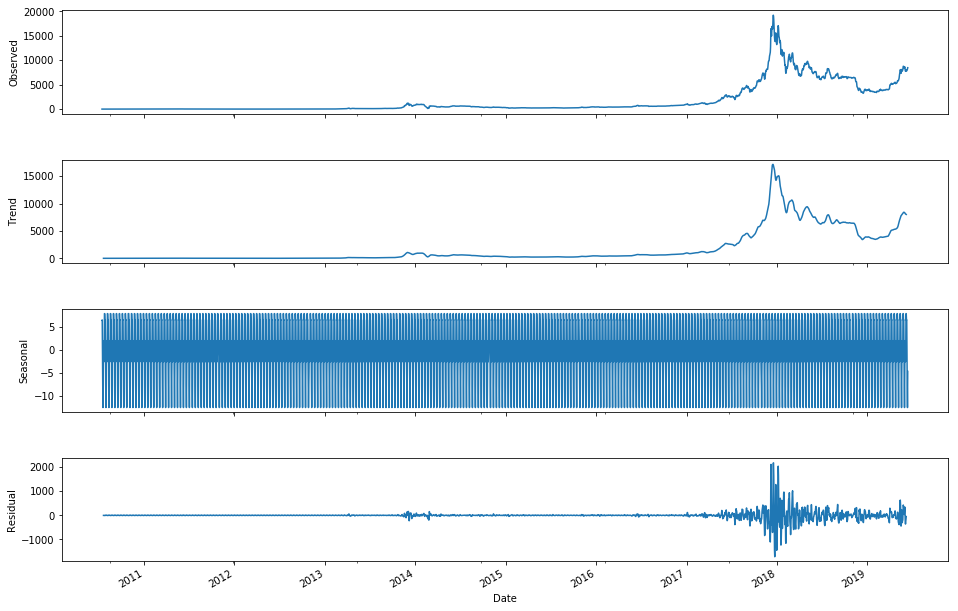

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp= seasonal_decompose(timeseries,freq=12)  
fig=decomp.plot()
fig.set_size_inches(15,10)


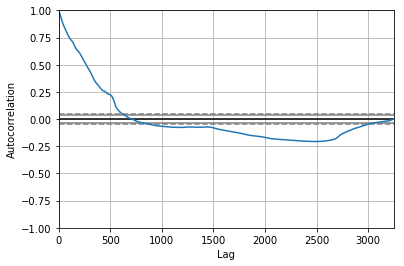

In [18]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(timeseries)
plt.show()

In [19]:
from statsmodels.tsa.stattools import adfuller

In [20]:
result=adfuller(timeseries.dropna())

In [21]:
result

(-1.2298964593210415,
 0.6606046369621543,
 28,
 3217,
 {'1%': -3.4323843567237304,
  '5%': -2.862438856077707,
  '10%': -2.5672484809368243},
 38103.61739809379)

In [22]:
from statsmodels.tsa.stattools import adfuller
def adf_check(time_series):
    result=adfuller(time_series)
    print("Augumented DF Test")
    labels=['ADF Test Statistics','p-value','# of lags','no of observation used']
    for value,label in zip(result,labels):
        print(label+":"+str(value))
    if result[1]<=0.05:
        print("Strong evidence against null hypotheis ")
        print("reject null hpyothesis")
        print("data has no unit root annd is stationary")
    else:
        print("Weak evidence against null hypotheis ")
        print("Fail to reject null hpyothesis")
        print("data has no unit root annd is stationary")

In [23]:
adf_check(timeseries)

Augumented DF Test
ADF Test Statistics:-1.2298964593210415
p-value:0.6606046369621543
# of lags:28
no of observation used:3217
Weak evidence against null hypotheis 
Fail to reject null hpyothesis
data has no unit root annd is stationary


In [24]:
df['First Difference']=df['APrice ']-df['APrice '].shift(1)

In [25]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,8

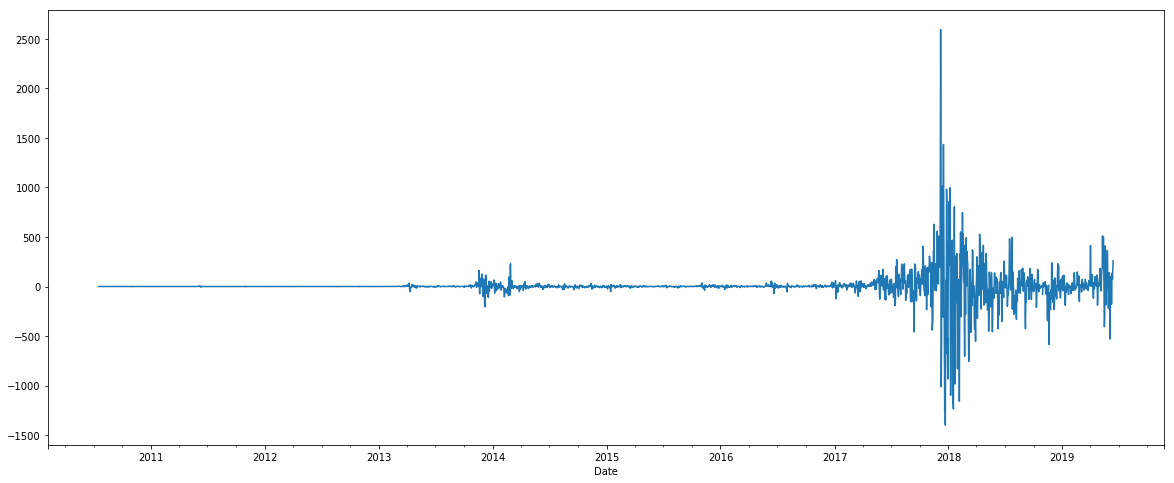

In [26]:
df['First Difference'].plot()

In [27]:
adf_check(df['First Difference'].dropna())

Augumented DF Test
ADF Test Statistics:-11.030674606608876
p-value:5.678776446488422e-20
# of lags:27
no of observation used:3208
Strong evidence against null hypotheis 
reject null hpyothesis
data has no unit root annd is stationary


In [28]:
df['YTD Second Difference']=df['First Difference']-df['First Difference'].shift(1)  


In [29]:
adf_check(df['YTD Second Difference'].dropna())

Augumented DF Test
ADF Test Statistics:-15.765896664783542
p-value:1.1765997845700783e-28
# of lags:27
no of observation used:3198
Strong evidence against null hypotheis 
reject null hpyothesis
data has no unit root annd is stationary


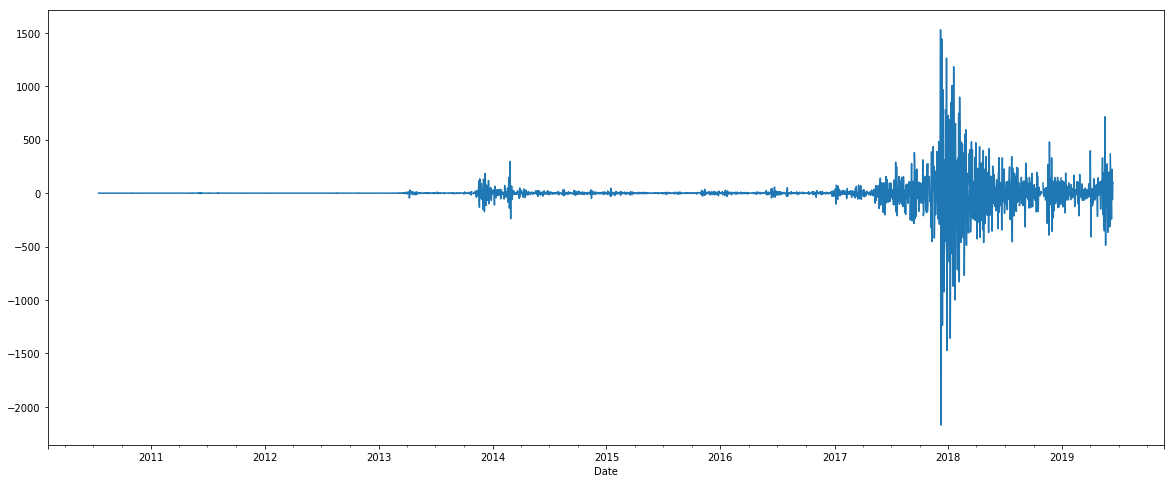

In [30]:
df['YTD Second Difference'].plot()

In [32]:
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
matplotlib.rcParams['figure.figsize'] = (20, 10)


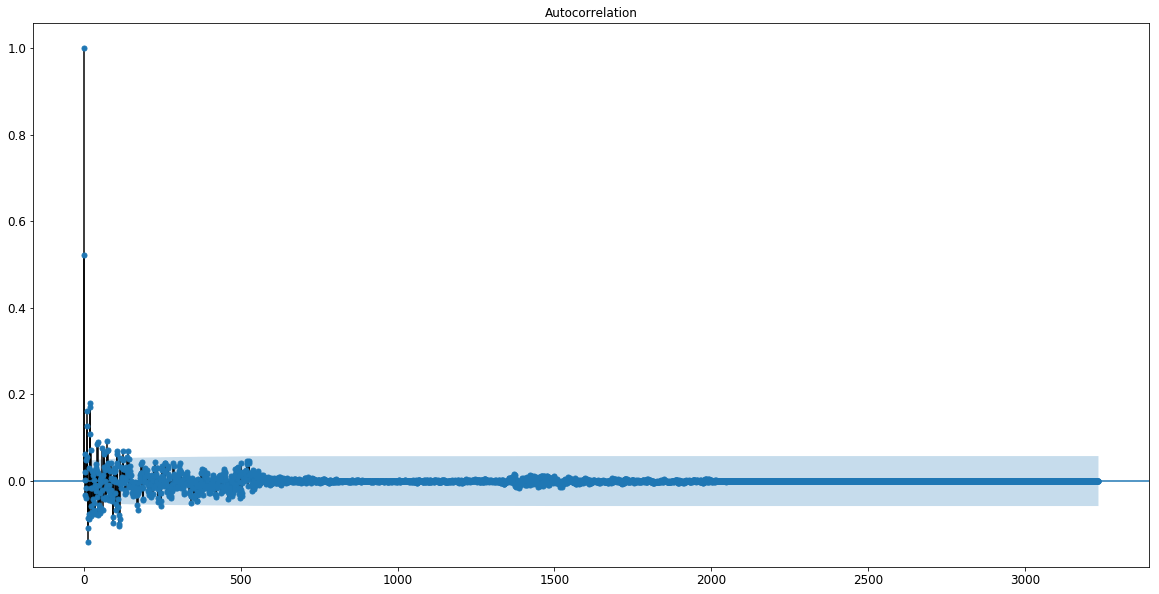

In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig_first=plot_acf(df['First Difference'].dropna())


In [34]:
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# fig_first=plot_pacf(df['First Difference'].dropna())


In [35]:
from pandas.plotting import autocorrelation_plot

In [36]:
from statsmodels.tsa.arima_model import ARIMA

In [37]:
help(ARIMA)


Help on class ARIMA in module statsmodels.tsa.arima_model:

class ARIMA(ARMA)
 |  ARIMA(endog, order, exog=None, dates=None, freq=None, missing='none')
 |  
 |  Autoregressive Integrated Moving Average ARIMA(p,d,q) Model
 |  
 |  Parameters
 |  ----------
 |  endog : array-like
 |      The endogenous variable.
 |  order : iterable
 |      The (p,d,q) order of the model for the number of AR parameters,
 |      differences, and MA parameters to use.
 |  exog : array-like, optional
 |      An optional array of exogenous variables. This should *not* include a
 |      constant or trend. You can specify this in the `fit` method.
 |  dates : array-like of datetime, optional
 |      An array-like object of datetime objects. If a pandas object is given
 |      for endog or exog, it is assumed to have a DateIndex.
 |  freq : str, optional
 |      The frequency of the time-series. A Pandas offset or 'B', 'D', 'W',
 |      'M', 'A', or 'Q'. This is optional if dates are given.
 |  
 |  
 |  Notes


In [44]:
y=df

In [45]:
import itertools

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [77]:
AIC_list = pd.DataFrame({}, columns=['param','param_seasonal','AIC'])
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df['APrice '],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=True,
                                            enforce_invertibility=True)

            results = mod.fit()

            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
          

        except:
            continue


C:\Users\Cityzen\Ananconda\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:62157.56156716697
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:51506.65972363311
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:51723.1697294131
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:51493.502359295104
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:41146.55476759619
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:41118.0304788902
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:43516.40208686653
ARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:41067.44170723351
ARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:41122.63195198901
ARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:41078.911941368795
ARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:42533.142386915395
ARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:41044.036241353584
ARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:38822.060789938434
ARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:38815.44209700776
ARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:41016.9091798666
ARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:38749.880957697
ARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:38816.42756612475
ARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:38808.26503440891
ARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:40102.01699

In [78]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['APrice '],order=(0,1,1),seasonal_order=(0,0,1,12),enforce_invertibility=False)
results=model.fit()

In [79]:
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                            APrice    No. Observations:                 3255
Model:             SARIMAX(0, 1, 1)x(0, 0, 1, 12)   Log Likelihood              -19404.721
Date:                            Sun, 23 Jun 2019   AIC                          38815.442
Time:                                    22:06:21   BIC                          38833.705
Sample:                                07-16-2010   HQIC                         38821.984
                                     - 06-13-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          1.0193      0.002    410.146      0.000       1.014       1.024
ma.S.L12      -0.0556      0.005   

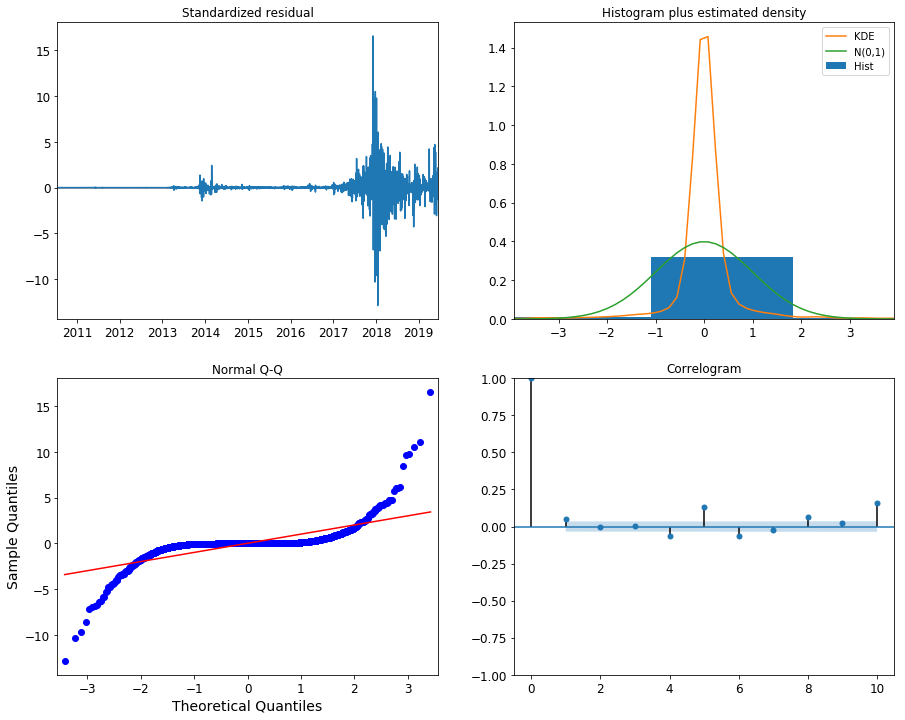

In [80]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [81]:
# import pickle
# with open('model.pickle', 'wb') as f:
#     pickle.dump(results, f)

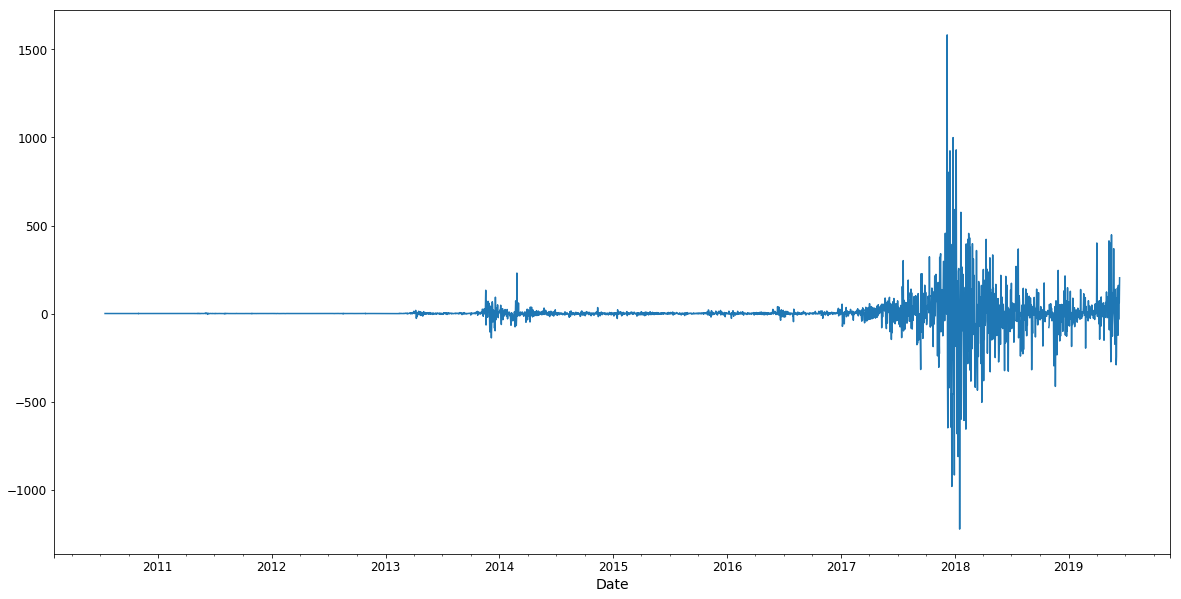

In [82]:
results.resid.plot()

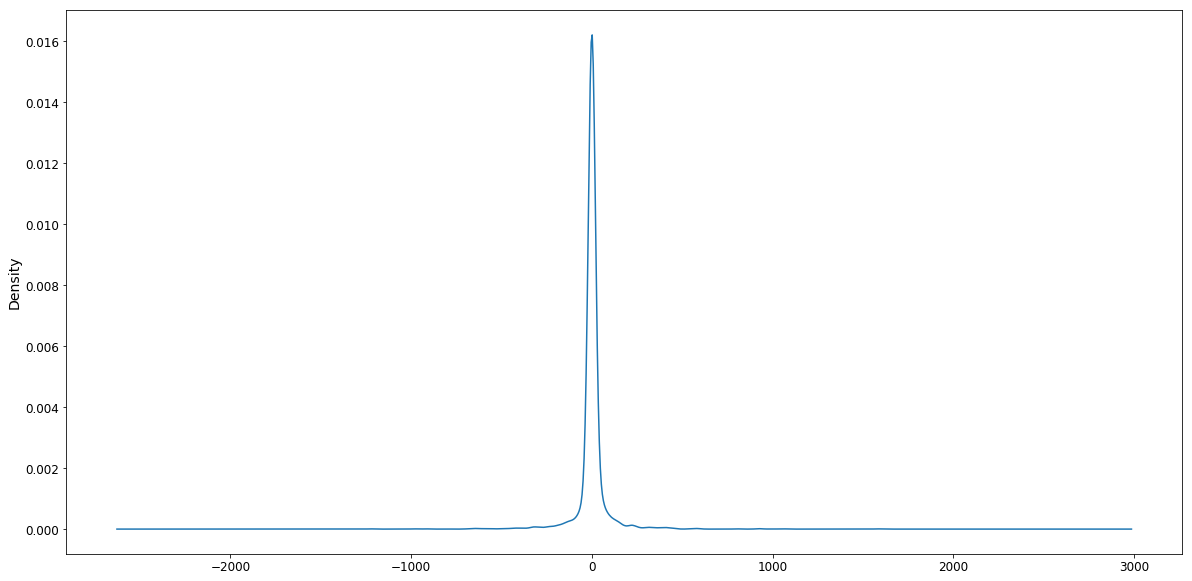

In [83]:
results.resid.plot(kind='kde')

In [84]:
df['Forecast']=results.predict(start=25)
df[['APrice ','Forecast']].iplot()

In [85]:
df.tail()

,APrice,First Difference,YTD Second Difference,Forecast
Date,,,,
2019-06-09,7832.219971,43.610108,223.205079,7672.176286
2019-06-10,7969.159912,136.939941,93.329833,8002.477342
2019-06-11,8045.729981,76.570069,-60.369872,7938.368866
2019-06-12,8204.855225,159.125244,82.555175,8142.141219
2019-06-13,8464.495118,259.639893,100.514649,8261.529030


In [110]:

# y_forecasted = df['Forecast']
# y_truth = df['APrice ']
# # Compute the mean square error
# mse = ((y_forecasted - y_truth) ** 2).mean()
# print('The Mean Squared Error of our forecasts is {}'.format(mse, 2)))
# print('The Mean Squared Error of our forecasts is {}'.format(np.sqrt(mse, 2)))


In [86]:
# saved_model = pickle.dumps(results)


In [87]:
# clf_from_pickle = pickle.loads(saved_model)
# a=clf_from_pickle.predict(start=110,end=150)
# a.to_json("picletest.json",date_format='iso',orient='index')

In [88]:
df['Forecast']=results.predict(start='2019-6-11',end='2021-6-15')
df


,APrice,First Difference,YTD Second Difference,Forecast
Date,,,,
2010-07-16,0.049510,NaN,NaN,NaN
2010-07-17,0.067675,0.018165,NaN,NaN
2010-07-18,0.083320,0.015645,-0.002520,NaN
2010-07-19,0.077770,-0.005550,-0.021195,NaN
2010-07-20,0.076975,-0.000795,0.004755,NaN
2010-07-21,0.064855,-0.012120,-0.011325,NaN
2010-07-22,0.056560,-0.008295,0.003825,NaN
2010-07-23,0.058580,0.002020,0.010315,NaN
2010-07-24,0.052520,-0.006060,-0.008080,NaN


In [92]:
from pandas.tseries.offsets import DateOffset

future_dates=[df.index[-1]+DateOffset(days=x) for x in range(1,365)]
future_dates

[Timestamp('2019-06-14 00:00:00'),
 Timestamp('2019-06-15 00:00:00'),
 Timestamp('2019-06-16 00:00:00'),
 Timestamp('2019-06-17 00:00:00'),
 Timestamp('2019-06-18 00:00:00'),
 Timestamp('2019-06-19 00:00:00'),
 Timestamp('2019-06-20 00:00:00'),
 Timestamp('2019-06-21 00:00:00'),
 Timestamp('2019-06-22 00:00:00'),
 Timestamp('2019-06-23 00:00:00'),
 Timestamp('2019-06-24 00:00:00'),
 Timestamp('2019-06-25 00:00:00'),
 Timestamp('2019-06-26 00:00:00'),
 Timestamp('2019-06-27 00:00:00'),
 Timestamp('2019-06-28 00:00:00'),
 Timestamp('2019-06-29 00:00:00'),
 Timestamp('2019-06-30 00:00:00'),
 Timestamp('2019-07-01 00:00:00'),
 Timestamp('2019-07-02 00:00:00'),
 Timestamp('2019-07-03 00:00:00'),
 Timestamp('2019-07-04 00:00:00'),
 Timestamp('2019-07-05 00:00:00'),
 Timestamp('2019-07-06 00:00:00'),
 Timestamp('2019-07-07 00:00:00'),
 Timestamp('2019-07-08 00:00:00'),
 Timestamp('2019-07-09 00:00:00'),
 Timestamp('2019-07-10 00:00:00'),
 Timestamp('2019-07-11 00:00:00'),
 Timestamp('2019-07-

In [93]:
future_df=pd.DataFrame(index=future_dates,columns=df.columns)
future_df

,APrice,First Difference,YTD Second Difference,Forecast
2019-06-14,NaN,NaN,NaN,NaN
2019-06-15,NaN,NaN,NaN,NaN
2019-06-16,NaN,NaN,NaN,NaN
2019-06-17,NaN,NaN,NaN,NaN
2019-06-18,NaN,NaN,NaN,NaN
2019-06-19,NaN,NaN,NaN,NaN
2019-06-20,NaN,NaN,NaN,NaN
2019-06-21,NaN,NaN,NaN,NaN
2019-06-22,NaN,NaN,NaN,NaN
2019-06-23,NaN,NaN,NaN,NaN


In [94]:
final_df=pd.concat([df,future_df],axis=0)
final_df

,APrice,First Difference,YTD Second Difference,Forecast
2010-07-16,0.049510,NaN,NaN,NaN
2010-07-17,0.067675,0.018165,NaN,NaN
2010-07-18,0.083320,0.015645,-0.002520,NaN
2010-07-19,0.077770,-0.005550,-0.021195,NaN
2010-07-20,0.076975,-0.000795,0.004755,NaN
2010-07-21,0.064855,-0.012120,-0.011325,NaN
2010-07-22,0.056560,-0.008295,0.003825,NaN
2010-07-23,0.058580,0.002020,0.010315,NaN
2010-07-24,0.052520,-0.006060,-0.008080,NaN
2010-07-25,0.053250,0.000730,0.006790,NaN


In [95]:
final_df['Forecast']=results.predict(start='2019-6-11',end='2021-8-20',freq='D')
final_df


,APrice,First Difference,YTD Second Difference,Forecast
2010-07-16,0.049510,NaN,NaN,NaN
2010-07-17,0.067675,0.018165,NaN,NaN
2010-07-18,0.083320,0.015645,-0.002520,NaN
2010-07-19,0.077770,-0.005550,-0.021195,NaN
2010-07-20,0.076975,-0.000795,0.004755,NaN
2010-07-21,0.064855,-0.012120,-0.011325,NaN
2010-07-22,0.056560,-0.008295,0.003825,NaN
2010-07-23,0.058580,0.002020,0.010315,NaN
2010-07-24,0.052520,-0.006060,-0.008080,NaN
2010-07-25,0.053250,0.000730,0.006790,NaN


In [96]:
final_df.to_excel("forecast_excel.xlsx")

In [99]:
final_df['APrice '].iplot()
final_df['Forecast'].iplot()


In [ ]:
a.to_json('pred.json',date_format='iso',orient='table')